# Inspect the Data

In [81]:
import os

for dirpath, dirnames, filenames in os.walk("../data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '../data'.
There are 3 directories and 0 images in '../data\test'.
There are 0 directories and 213 images in '../data\test\angry'.
There are 0 directories and 207 images in '../data\test\happy'.
There are 0 directories and 149 images in '../data\test\sad'.
There are 3 directories and 0 images in '../data\train'.
There are 0 directories and 850 images in '../data\train\angry'.
There are 0 directories and 830 images in '../data\train\happy'.
There are 0 directories and 598 images in '../data\train\sad'.


In [82]:
train_dir = "../data/train/"
test_dir = "../data/test/"

In [83]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir) 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['angry' 'happy' 'sad']


In [84]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (224, 224, 3)


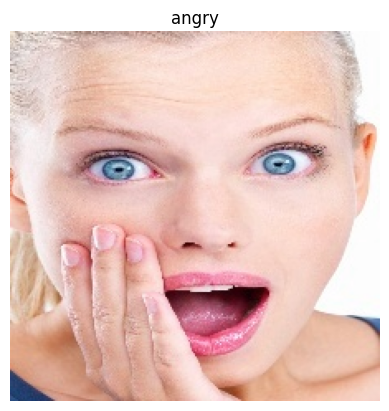

In [85]:
img = view_random_image(target_dir="../data/train/",
                        target_class="angry")

# Preprocess the Data

In [86]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=20,
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   preprocessing_function=tf.keras.applications.inception_v3.preprocess_input,
                                   )

test_datagen = ImageDataGenerator(rescale=1/255.,
                                  preprocessing_function=tf.keras.applications.inception_v3.preprocess_input
                                  )

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               color_mode = "rgb",
                                               class_mode='categorical',
                                               seed=42)

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              color_mode = "rgb",
                                              class_mode='categorical',
                                              seed=42)

Found 2278 images belonging to 3 classes.
Found 569 images belonging to 3 classes.


# Create the Model

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  # Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  # Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [88]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the Model

In [89]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
72/72 [==============================] - 24s 327ms/step - loss: 1.0892 - accuracy: 0.3683 - val_loss: 1.0814 - val_accuracy: 0.3743
Epoch 2/5
72/72 [==============================] - 27s 370ms/step - loss: 1.0802 - accuracy: 0.3692 - val_loss: 1.0710 - val_accuracy: 0.3673
Epoch 3/5
72/72 [==============================] - 25s 354ms/step - loss: 1.0732 - accuracy: 0.3810 - val_loss: 1.0657 - val_accuracy: 0.4183
Epoch 4/5
72/72 [==============================] - 26s 355ms/step - loss: 1.0714 - accuracy: 0.4122 - val_loss: 1.0626 - val_accuracy: 0.3884
Epoch 5/5
72/72 [==============================] - 26s 359ms/step - loss: 1.0630 - accuracy: 0.4293 - val_loss: 1.0582 - val_accuracy: 0.4692


In [90]:
history = model.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
72/72 [==============================] - 234s 3s/step - loss: 0.9993 - accuracy: 0.5483 - val_loss: 2.0988 - val_accuracy: 0.3743
Epoch 2/5
72/72 [==============================] - 273s 4s/step - loss: 0.8228 - accuracy: 0.6370 - val_loss: 1.1400 - val_accuracy: 0.3638
Epoch 3/5
72/72 [==============================] - 269s 4s/step - loss: 0.7965 - accuracy: 0.6506 - val_loss: 1.1128 - val_accuracy: 0.3638
Epoch 4/5
72/72 [==============================] - 265s 4s/step - loss: 0.7724 - accuracy: 0.6747 - val_loss: 2.0251 - val_accuracy: 0.3620
Epoch 5/5
72/72 [==============================] - 284s 4s/step - loss: 0.7066 - accuracy: 0.7090 - val_loss: 1.0698 - val_accuracy: 0.4112


# Evaluate the Model

In [91]:
model_9.evaluate(test_data)

18/18 [==============================] - 5s 260ms/step - loss: 1.0608 - accuracy: 0.4657


[1.0607997179031372, 0.46572935581207275]

In [94]:
model.evaluate(test_data)

18/18 [==============================] - 15s 827ms/step - loss: 1.0695 - accuracy: 0.4077


[1.0694987773895264, 0.40773287415504456]

In [92]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

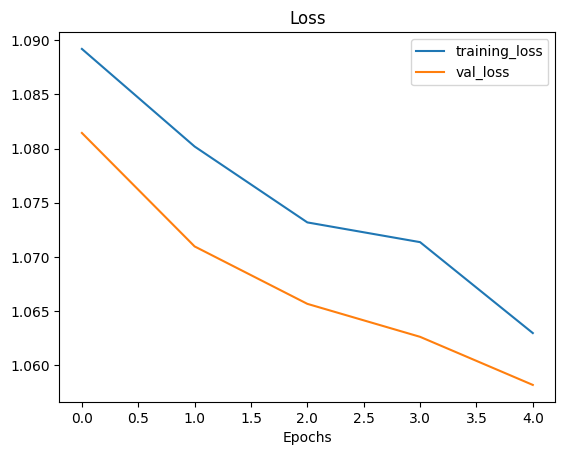

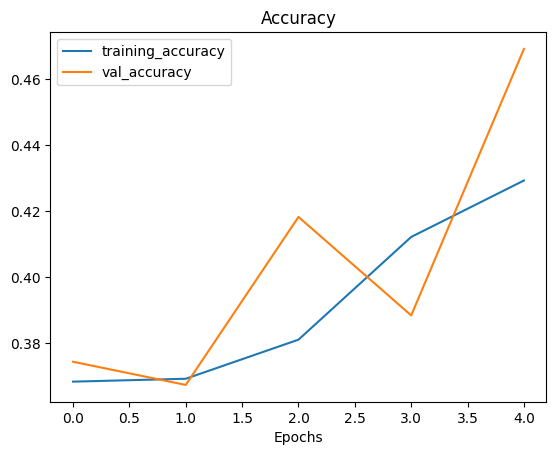

In [93]:
plot_loss_curves(history_9)